<h1 style="text-align:center">Grafos y sus aplicaciones $^{[1][2]}$</h1>
<p style="text-align:justify">
La teoría de grafos fue formulada por Leonhard Euler al analizar el problema de los siete puentes de Königsberg en 1736. En este problema, Euler representó cada área de tierra como un vértice y cada puente como una arista. Con la pariedad de los vértices determinó que no existe solución.
    </p>
<p style="text-align:justify">
Actualmente, existen distintas aplicaciones de teoría de grafos para diferentes tipos de información, por ejemplo: estructuras de red de computadoras, modelos moleculares, patrones de migración, estructuras gramaticales, ciencia de datos, entre otros más.
Un grafo se define como una colección de $n$ nodos, también llamados vértices, conectados por $E$ enlaces, también llamados aristas, $G(V,E)$.
</p>
<p style="text-align:justify">
En teoría de grafos existen distintos tipos de problemas que son resueltos con distintas soluciones, muchas de ellas como algoritmos que funcionan para grafos con características determinadas (arquitectura, comunicación, entre otros). 
Uno de los problemas más comunes en teoría de grafos es la distancia más corta entre dos pares nodos en la red.
</p>

<h1 style="text-align:center">Algoritmo de Bellman-Ford en sistemas de compúto $^{[3]}$</h1>
<p style="text-align:justify">
La comunicación entre los nodos de una red de computadoras es fundamental, tanto a nivel hardware como software. Esta comunicación lleva acabo la coordinación de recursos computacionales para resolver temas complejos. Este tipo de procesadores interconectados con arquitectura de memoria distribuida, procesan de forma independiente algoritmos concurrentes para resolver determinado problema como un sistema distribuido.
</p>
<p style="text-align:justify">
Este trabajo consiste en resolver el problema del camino más corto con el algoritmo de Bellman-Ford utilizando openMPI en python. Con base en la información de un grafo (matriz de adyacencia y matriz de pesos) el algoritmo determinará la trayectoria más corta de un nodo inicial $n_i$ a un nodo final $n_f$. 
    <br>
    Se ejecuta a nivel local (computadoras) con 12 procesadores y en un cluster de LAN con 6 computadoras Unix (Ubuntu-20.04).
</p>

<p style="text-align:justify">
Las aplicaciones son amplias, incluyendo telecomunicaciones, cómputo científico, sistema de control o, incluso sistemas de escudos antimisiles que protengen una ciudad. Todos estos sistemas deben cumplir con características que los hagan eficientes respecto a la actividad que realicen. Los problemas que enfrentan los sistemas distribuidos para lograr el óptimo en desempeño son: conceso, comunicación, dirección de recursos, y sincronización. Todos estos problemas invoclucran temás más amplios, tales como: sistemas en tiempo real, programación concurrente-distribuitiva y teoría de grafos, sin mencionar las herramientas en tecnología como lo son manejo de Linux a nivel de redes y administracion de recursos, manejo de lenguajes de progrmación como C, Python o Java que incluyan librerías como openMPI, entre otras.
</p>

<h1 style="text-align:center">Descripción del algortimo $^{[3]}$</h1>
<p style="text-align:justify">
Sea un grafo con una comunicación unidireccional entre un par de vecinos, en el que cada vértice $e=(i, j)$ tiene asociado un valor real no negativo como peso, $weigth_{e=ij}$, entonces el peso del camino es la suma de los pesos de cada vértice de la trayectoria. El problema consiste en encontrar la ruta más corta entre dos nodos del grafo cuya distancia sea la de menor peso.
Por sencillez, asumiremos que cada procesador conoce inicialmente el peso de todos sus vertices y el número de $n$ nodos que hay en la red. 
</p>
<p style="text-align:justify">
Cada proceso $i$ mantienene un registro de la distancia más corta desde el nodo $i_0$, $dist$, que es conocida hasta ese momento por  sus antecesores, y el procesador actual que procesa $i$ en un camino cuyos pesos son $dist$. Inicialmente, $dist_{i0} = 0$ , $dist_{i} = \infty$ for $i$ $\neq$ $i_0$ y los componentes de los antecesores son indefinidos. En cada iteración, cada proceso envía el valor de $dist$ a todos sus vecinos, entonces cada procesaodr actualiza el valor de $dist$ por un paso de relajación, en el que toma el mínimo del valor previo del $dist$ y los recibidos de los vecinos. Si el valor de $dist$ cambia en esa iteración, el nodo predecesor es actualizado. Después de $n-1$ iteraciones, el valor de $dist$ es el camino más corto.
</p>
<h3 >Análisis de compejidad</h3>
La complejidad del tiempo para el algoritmo de BellmanFord es $n-1$, y el número de mensajes es $(n-1)|E|$.

<h2 style="text-align:center">Algoritmo de BellmanFord para un origen. Simulación utilizando un grafo y sin comunicación de procesos.</h2>
<p style="text-align:justify">
Para comprender el algortimo primero se hizo una clase en python que define las propiedades de un grafo y el método de BellmanFord. Seguido de un ejemplo como su correcta implementación.
</p>

In [18]:
#hide
from fastai.vision.all import *

In [2]:
### EJEMPLO con python
# Clase que representa el grafo a estudiar
class grafo:
    def __init__(self, vertices):
        self.V = vertices  # No. vértices
        self.grafo = []
    def agregararista(self, u, v, w):
        self.grafo.append([u, v, w])
    def printResultado(self, dist):
        print("Distancia desde la fuente a cada nodo")
        for node in range(self.V):
            print(f"{node}\t\t{dist[node]}")
    # Método de la clase que implemente Bellman-Ford para encontrar la distancia más corta de nodo inicial  a todos los demás
    def BellmanFord(self, nodoInicial):
        # Etapa inicial: Inicializar el valor de la distancia en todos los nodos, inicial como cero los demás infinito
        dist = [float("Inf")] * self.V
        dist[nodoInicial] = 0
        # Etapa Intermedia: etapa de iteración, etapa de relajación para encontrar el camino más corto
        for _ in range(self.V - 1):
            # Actualizar el valor dist y el indice de predecesor de los vértices vecinos. 
            for u, v, w in self.grafo:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
        # Etapa final 3: Revisar los ciclos con peso negativo. Esto valida que el camino calcualdo se el más corto en caso de que no haya.
        for u, v, w in self.grafo:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("El grafo contiene ciclos negativos")
                return
        self.printResultado(dist)

In [3]:
###GRAFICAR
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()
G.add_edge(0, 1, weight=-1)
G.add_edge(0, 2, weight=4)
G.add_edge(1, 2, weight=3)
G.add_edge(1, 3, weight=2)
G.add_edge(1, 4, weight=2)
G.add_edge(3, 2, weight=5)
G.add_edge(3, 1, weight=1)
G.add_edge(4, 3, weight=-3)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
pos = {1: (0, 0), 2: (3, 1), 3: (4, 0), 4: (1, -1), 0: (1, 2)}

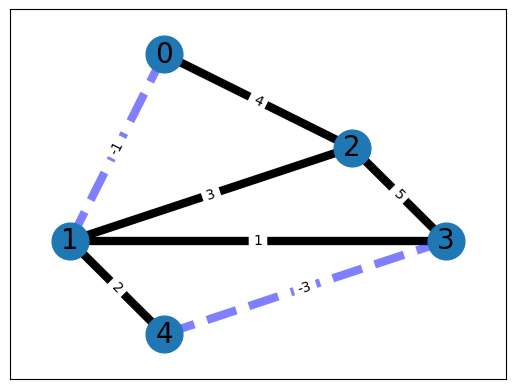

In [4]:
#Visualizar el grafo del ejemplo anterior
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.gca()
ax.margins(0.10)

In [5]:
g = grafo(5)
g.agregararista(0, 1, -1)
g.agregararista(0, 2, 4)
g.agregararista(1, 2, 3)
g.agregararista(1, 3, 2)
g.agregararista(1, 4, 2)
g.agregararista(3, 2, 5)
g.agregararista(3, 1, 1)
g.agregararista(4, 3, -3)

In [6]:
###RESULTADOS
g.BellmanFord(0)

Distancia desde la fuente a cada nodo
0		0
1		-1
2		2
3		-2
4		1


<h2 style="text-align:center">Ahora una implementación utilizando un protocolo en MPI en python</h2>
<p style="text-align:justify">
El algoritmo fue diseñado de tal manera que se implemente el algoritmo de Bellman Ford sobre una trayectoria para encontrar el camino más corto utilizando una heuristica con base en la reducción de la distancia conforme se alcanza el nodo final.
<br>
Se implemento una comunicación punto a punto con bloqueo entre los nodos y sus vecinos cuando exite el envío de la distancia de cada nodo a su vecino. Mientras que el nodo inicial, que lleva toda la coordinación y computo de la trayectoria envía y recibe información con los nodos utilizando comunicación colectiva tipo broadcast como se puede ver en el código "bellmanford_1.py"
<br>
    El siguiente grafo es el un ejemplo de cómo el algoritmo es capaz de resolver una trayectoria con pesos.
</p>

In [ ]:
###BellmanFord Algorithm
if rank == nodoIterar:
    DISTDICTIONARY.update({rank:0})
else:
    DISTDICTIONARY.update({rank:float("Inf")})
#epata de relajación
comm.barrier()
for i in range(iterationIndex):
    vecinostosend = adyacenciaMatriz[rank]
    vecinostosend[rank] = 0
    vecinostorecieve = [0]*size
    for k in range(len(adyacenciaMatriz)):
        iterarFila = adyacenciaMatriz[k]
        for l in range(len(iterarFila)):
            if l==rank:
                vecinostorecieve[k] =  iterarFila[l]
    for i in range(len(vecinostosend)):
        if vecinostosend[i] == 1:
            tag= int(f"{rank}{i}")
            message = float( DISTDICTIONARY[rank] + weigthMatrix[rank][i])
            MPI.COMM_WORLD.send(message, dest=i, tag=tag)
    for i in range(len(vecinostorecieve)):
        if vecinostorecieve[i] == 1:
            tag= int(f"{i}{rank}")
            message = MPI.COMM_WORLD.recv(source=i, tag=tag)
            if message < DISTDICTIONARY[rank]:
                DISTDICTIONARY[rank] = message
dataGather = comm.gather(DISTDICTIONARY, nodoInicial)             
##Grafo negativo
#Si se itera una vez más en el grafo el algoritmo de BellmanFord y las distancias cambian, entonces es un grafo de ciclo negativo
vecinostosend = adyacenciaMatriz[rank]
vecinostosend[rank] = 0
vecinostorecieve = [0]*size
for k in range(len(adyacenciaMatriz)):
    iterarFila = adyacenciaMatriz[k]
    for l in range(len(iterarFila)):
        if l==rank:
            vecinostorecieve[k] =  iterarFila[l]
for i in range(len(vecinostosend)):
    if vecinostosend[i] == 1:
        tag= int(f"{rank}{i}")
        message = float( DISTDICTIONARY[rank] + weigthMatrix[rank][i])
        MPI.COMM_WORLD.send(message, dest=i, tag=tag)
for i in range(len(vecinostorecieve)):
    if vecinostorecieve[i] == 1:
        tag= int(f"{i}{rank}")
        message = MPI.COMM_WORLD.recv(source=i, tag=tag)
        if message < DISTDICTIONARY[rank]: 
            DISTDICTIONARY[rank] = message
dataGatherIsNegative = comm.gather(DISTDICTIONARY, nodoInicial) 
if dataGather == dataGatherIsNegative: #Son iguales, no hay ciclo negativo 
## Envíar datos al nodo inicial para trayectoria con heurística

In [7]:
G = nx.Graph()
G.add_edge(1, 4, weight=1)
G.add_edge(2, 4, weight=1)
G.add_edge(2, 5, weight=1)
G.add_edge(5, 3, weight=1)
G.add_edge(5, 9, weight=1)
G.add_edge(3, 6, weight=1)
G.add_edge(4, 7, weight=1)
G.add_edge(4, 8, weight=10)
G.add_edge(6, 9, weight=1)
G.add_edge(8, 5, weight=1)
G.add_edge(8, 11, weight=10)
G.add_edge(9, 10, weight=1)
G.add_edge(9, 11, weight=1)
G.add_edge(11, 12, weight=1)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
pos = {1: (0, 0), 2: (2, 0), 3: (4, 0), 4: (1, -1), 5: (3, -1),
       6: (5, -1), 7: (0.03, -2), 8: (2, -2), 9: (4, -2), 10: (5,-3),
      11: (3, -3), 12: (4,-4)}

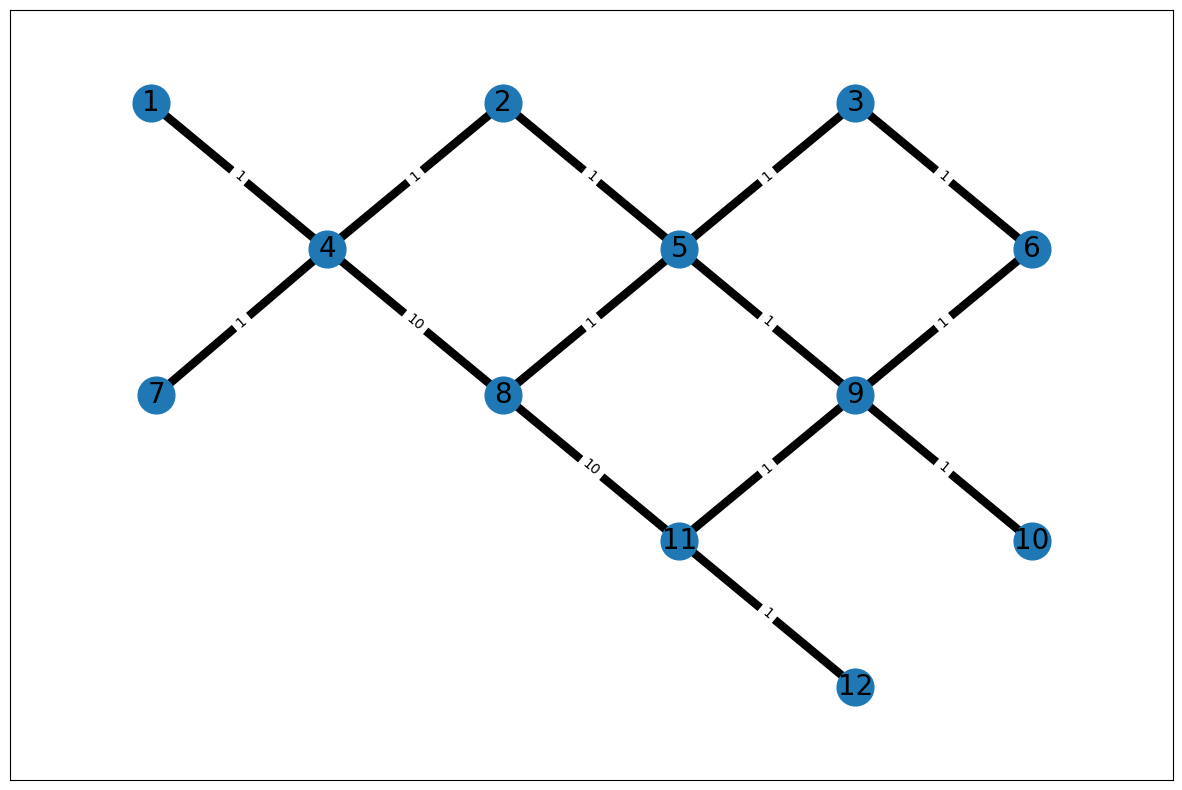

In [8]:
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.gca()
ax.margins(0.10)

In [9]:
G = nx.Graph()
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(2, 5)
G.add_edge(5, 2)
G.add_edge(5, 3)
G.add_edge(3, 5)
G.add_edge(3, 6)
G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 7)
G.add_edge(4, 8)
G.add_edge(6, 3)
G.add_edge(6, 9)
G.add_edge(7, 4)
G.add_edge(8, 4)
G.add_edge(8, 5)
G.add_edge(8, 11)
G.add_edge(9, 5)
G.add_edge(9, 6)
G.add_edge(9, 10)
G.add_edge(9, 11)
G.add_edge(10, 9)
G.add_edge(11, 8)
G.add_edge(11, 9)
G.add_edge(12, 11)
H = G.copy()
pos = {1: (0, 0), 2: (2, 0), 3: (4, 0), 4: (1, -1), 5: (3, -1),
       6: (5, -1), 7: (0.03, -2), 8: (2, -2), 9: (4, -2), 10: (5,-3),
      11: (3, -3), 12: (4,-4)}
cycle= [1, 4, 2, 5, 9, 11, 12]
edge_list = list(nx.utils.pairwise(cycle))

The route of the traveller is: [1, 4, 2, 5, 9, 11, 12]


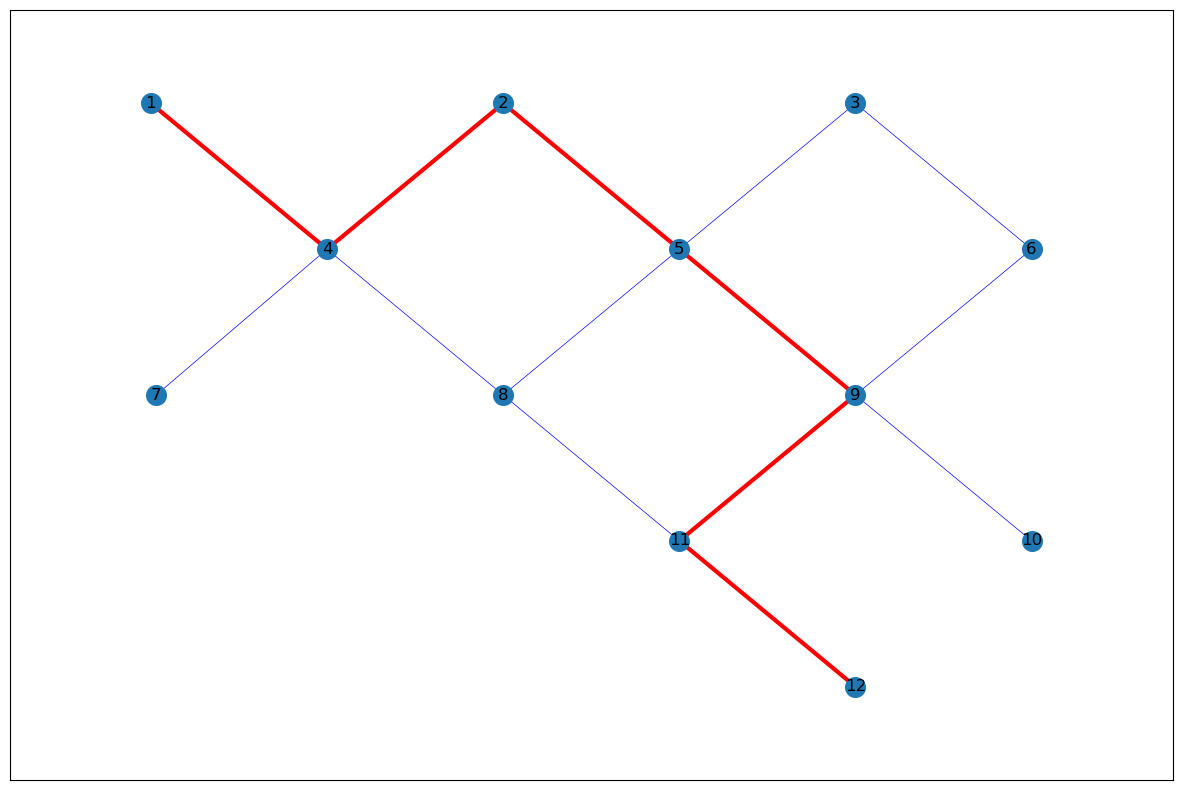

In [10]:
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,)
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.gca()
ax.margins(0.10)
print("The route of the traveller is:", cycle)

<h1 style="text-align:center">¿Qué pasa si hay ciclos negativos?</h1>
<p style="text-align:justify">
El algoritmo de Bellman Ford es capaz de identificar la presencia de un ciclo negativo en un grafo. De tal forma que de presentarse dentro de la trayectoria, esta no podría definirse porque la etapa de relación no converge a un valor con $N$ iteraciones.
</p>

In [11]:
G = nx.Graph()
G.add_edge(1, 4, weight=1)
G.add_edge(2, 4, weight=-3)
G.add_edge(2, 5, weight=-3)
G.add_edge(5, 3, weight=1)
G.add_edge(5, 9, weight=1)
G.add_edge(3, 6, weight=1)
G.add_edge(4, 7, weight=1)
G.add_edge(4, 8, weight=-3)
G.add_edge(6, 9, weight=1)
G.add_edge(8, 5, weight=-3)
G.add_edge(8, 11, weight=1)
G.add_edge(9, 10, weight=1)
G.add_edge(9, 11, weight=1)
G.add_edge(11, 12, weight=1)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
pos = {1: (0, 0), 2: (2, 0), 3: (4, 0), 4: (1, -1), 5: (3, -1),
       6: (5, -1), 7: (0.03, -2), 8: (2, -2), 9: (4, -2), 10: (5,-3),
      11: (3, -3), 12: (4,-4)}

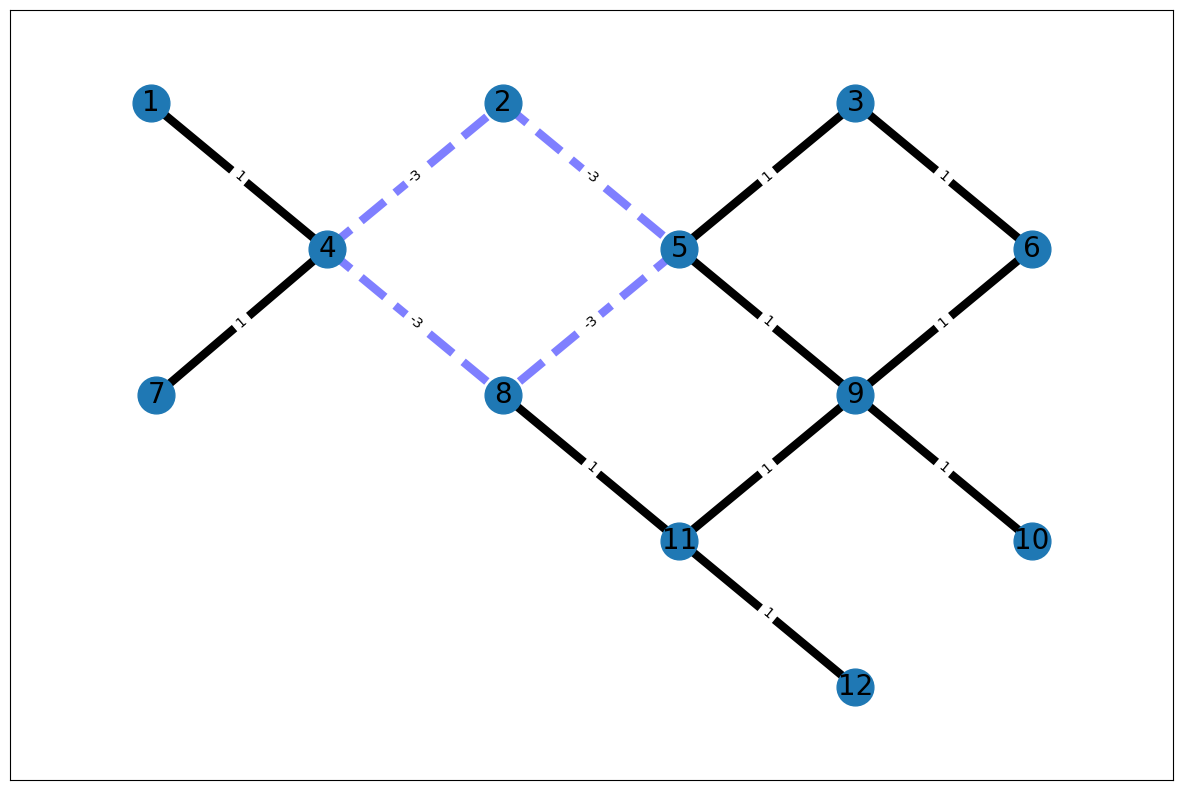

In [12]:
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.gca()
ax.margins(0.10)

<h2 style="text-align:center">Ahora vemos un ejemplo con el cluster de coputadoras utilizando el siguiente grafo:</h2>
<p style="text-align:justify">
Utilizando Proxmox con los servidores visto en clase se construyo una red de área local (LAN, por sus siglas en inglés) de 6 computadoras tipo Unix (Ubuntu 20.04). En cada uno se distribuyeron la llaves públicas para acceder de forma remota con SSH entre ellas. Además, se instalo NFS para distribuir un sistema de archivos en la LAN. Aquí es donde está el ejecutable de python ""bellmanford_lan.py". 
Para después ejecutarlo con el comando:
    <br>
    <br>
    mpiru -np 6 -hosts nodo01,nodo02,nodo03,nodo04,nodo05,nodo06 python3 bellmanford_lan.py
    <br>
    <br>
El ejemplo será ir del nodo inicial 1 al nodo inicial 3
</p>

In [13]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
G.add_edge(2, 1, weight=1)
G.add_edge(2, 4, weight=1)
G.add_edge(3, 5, weight=1)
G.add_edge(4, 2, weight=1)
G.add_edge(4, 5, weight=1)
G.add_edge(5, 4, weight=1)
G.add_edge(5, 3, weight=1)
G.add_edge(5, 6, weight=1)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
pos = {1: (0, 0), 2: (1, 0), 3: (2, 0), 4: (1, -1), 5: (2, -1), 6: (3, -1)}

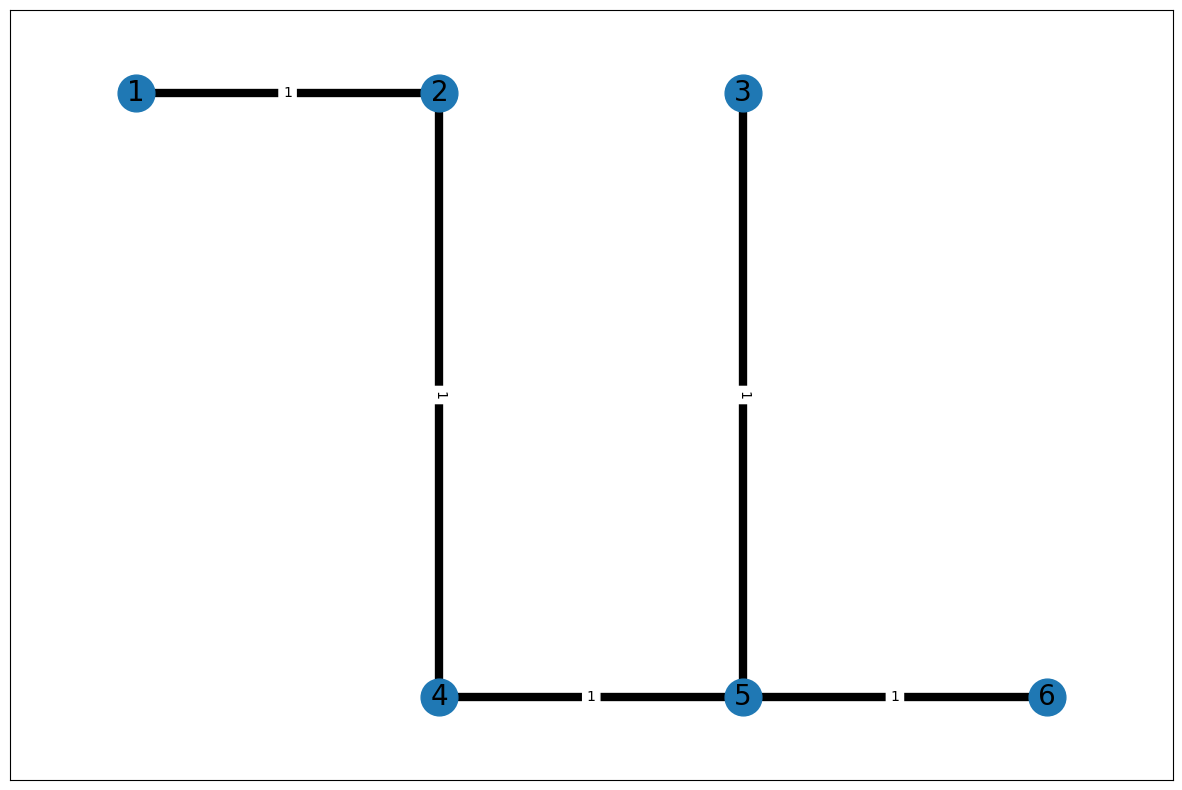

In [14]:
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.gca()
ax.margins(0.08)

In [15]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
G.add_edge(2, 1, weight=1)
G.add_edge(2, 4, weight=1)
G.add_edge(3, 5, weight=1)
G.add_edge(4, 2, weight=1)
G.add_edge(4, 5, weight=1)
G.add_edge(5, 4, weight=1)
G.add_edge(5, 3, weight=1)
G.add_edge(5, 6, weight=1)
H = G.copy()
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
pos = {1: (0, 0), 2: (1, 0), 3: (2, 0), 4: (1, -1), 5: (2, -1), 6: (3, -1)}
cycle= [1, 2, 4, 5, 3]
edge_list = list(nx.utils.pairwise(cycle))

The route of the traveller is: [1, 2, 4, 5, 3]


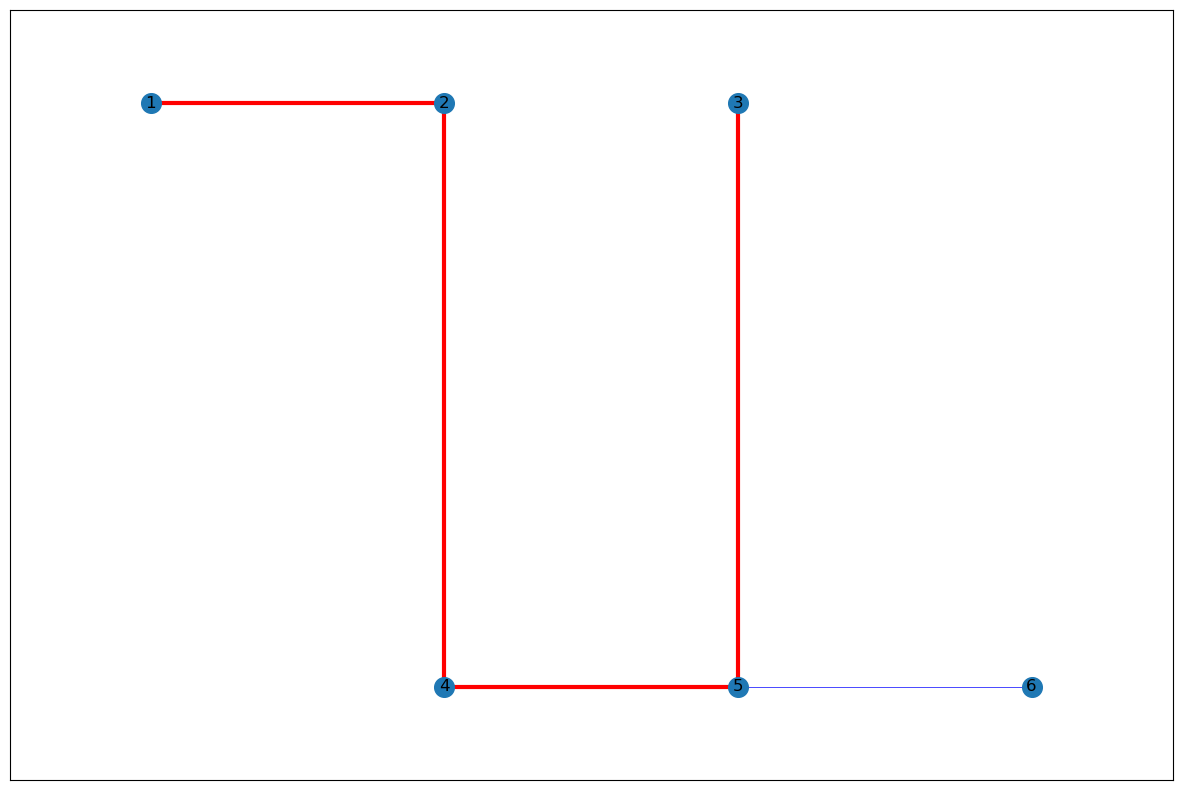

In [16]:
###Resultados
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,)
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.gca()
ax.margins(0.10)
print("The route of the traveller is:", cycle)

<h1 style="text-align:center">Conclusiones</h1>
<p style="text-align:justify">
Este proyecto me permitio entender el algoritmo de BellmanFord, así como sus limitaciones y ventajas respecto a otros algortimos como Dijkstra. Además, resolviendo el problema de "encontrar una trayectoria" fuí capaz de compreder sus aplicaciones dentro de grafos, que facilmente podría extenderse a distintos problemas. Como describir la trayectoria de un repartidor, enviar información entre computadoras con paso de mensajes o procesamiento de datos.
    Por otra parte, este proyecto permitió poner en práctica las herramientas de un cluster aprendidas en clase como Proxmox y sistemas Unix, a nivel operativo y Open MPI como elemento de comunicación entre procesos distribuidos.
</p>
<h1 style="text-align:center">Referencias</h1>
<ol>
    <li>Moreira O. (2021). Graphs : theory and algorithms. Arcler Press. Retrieved June 10 2023 from INSERT-MISSING-URL. pp. 1-5 </li>
    <li>Pozrikidis C. (2014). An introduction to grids graphs and networks. Oxford University Press. Retrieved June 10 2023 from http://search.ebscohost.com/login.aspx?direct=true&scope=site&db=nlebk&AN=698155. pp. 26-31</li>
    <li>Lynch Nancy (1996) Distributed algorithms. Morgan Kaufmann Publishers, Inc pp.61-63 </li>
</ol>